# Logistic Regression Assignment

In [117]:
# Importing required Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [118]:
#Load the dataset
data=pd.read_csv('C:/Users/Anusha/Desktop/ExcelRProjects/dataset/Bank_2.csv') 
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


### performing Initial EDA on given dataset

In [3]:
##check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### No Null values existing in the given dataset

In [5]:
##check for duplicated values
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [99]:
# no duplicate data existing

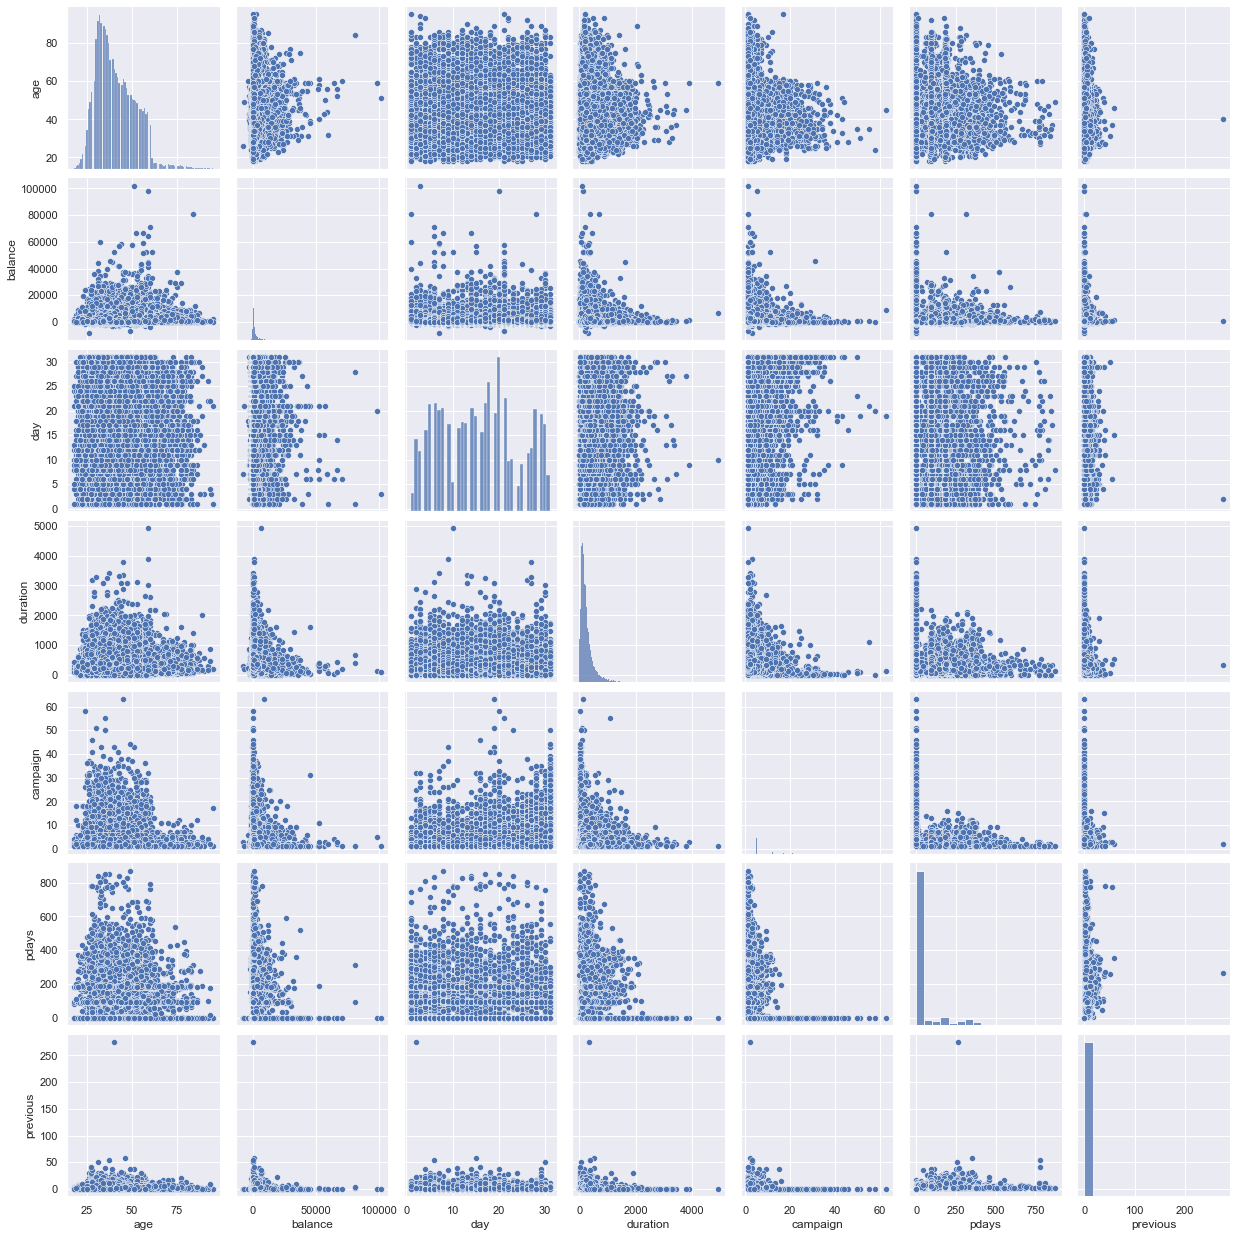

In [18]:
# check for relationship b/w variables
sns.set_style(style = "darkgrid")
sns.pairplot(customerdata)

In [29]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#### Visualizations for catogorical variables to know the relation b/w input and output variable

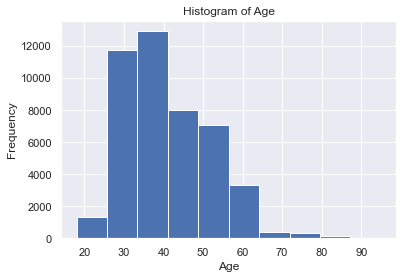

In [34]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

###### It seams age is good predictor in predicting y value, From above visualizations we can also observe most of the customers of the bank in the given dataset are in the age range of 30-40

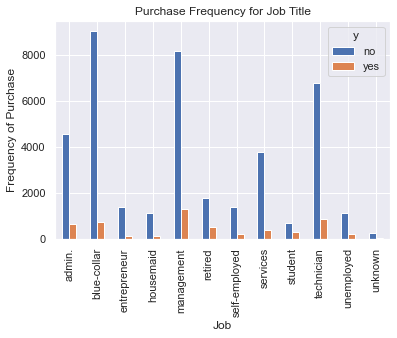

In [22]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')


###### The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

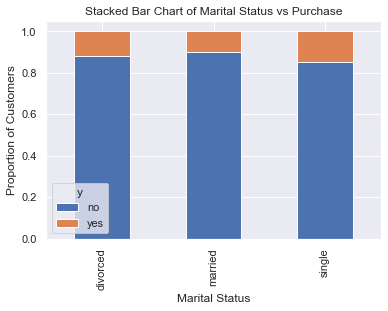

In [24]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


###### The marital status does not seem a strong predictor for the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

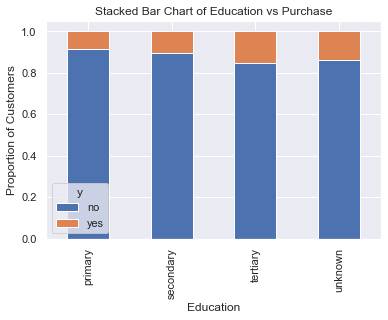

In [25]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

###### it seems even eduaction is contributing towords prediction of output variable to an extent


Text(0, 0.5, 'Frequency of Purchase')

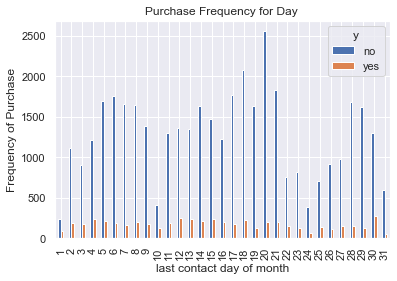

In [29]:
pd.crosstab(data.day,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day ')
plt.xlabel('last contact day of month')
plt.ylabel('Frequency of Purchase')

In [30]:
### Last contact day of the month is a good predictor of the outcome.

Text(0, 0.5, 'Frequency of Purchase')

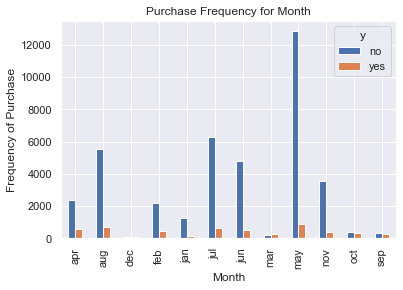

In [31]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

In [32]:
### last contact month of year is a good predictor of the outcome.

In [36]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


Text(0, 0.5, 'Frequency of Purchase')

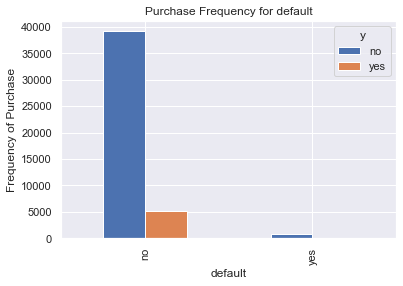

In [37]:
pd.crosstab(data.default,data.y).plot(kind='bar')
plt.title('Purchase Frequency for default')
plt.xlabel('default')
plt.ylabel('Frequency of Purchase')

###### from the above graph we can conclude customers who are being defaulters are not been offered this purchase

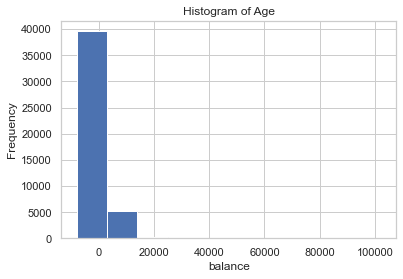

In [21]:
data.balance.hist()
plt.title('Histogram of Age')
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Text(0, 0.5, 'Frequency of Purchase')

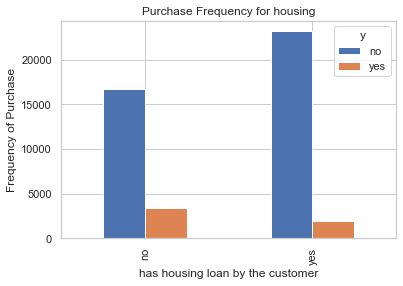

In [7]:
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('Purchase Frequency for housing')
plt.xlabel('has housing loan by the customer')
plt.ylabel('Frequency of Purchase')

###### customers who dont have housing loan have subscribed for termdeposit little high compared to customers with loan,but it cannot be considere as a too good predictor

Text(0, 0.5, 'Frequency of Purchase')

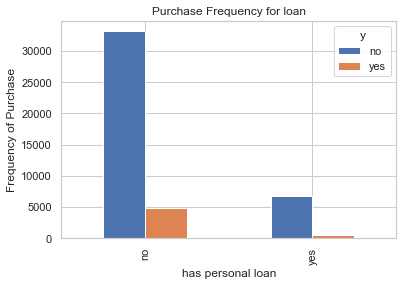

In [9]:
pd.crosstab(data.loan,data.y).plot(kind='bar')
plt.title('Purchase Frequency for loan')
plt.xlabel('has personal loan')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

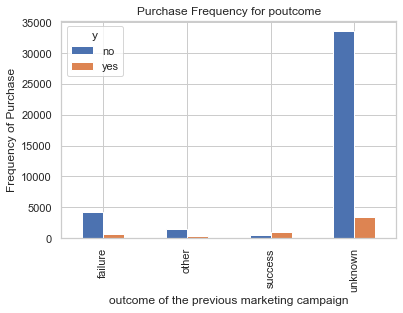

In [10]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for poutcome')
plt.xlabel('outcome of the previous marketing campaign')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

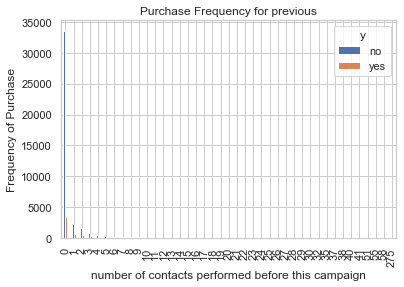

In [11]:
pd.crosstab(data.previous,data.y).plot(kind='bar')
plt.title('Purchase Frequency for previous')
plt.xlabel('number of contacts performed before this campaign')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

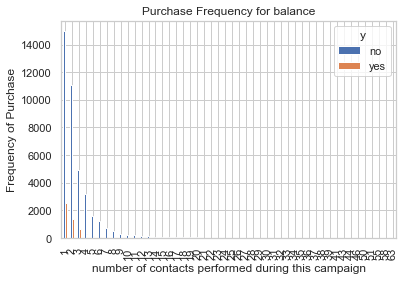

In [15]:
pd.crosstab(data.campaign,data.y).plot(kind='bar')
plt.title('Purchase Frequency for balance')
plt.xlabel('number of contacts performed during this campaign')
plt.ylabel('Frequency of Purchase')

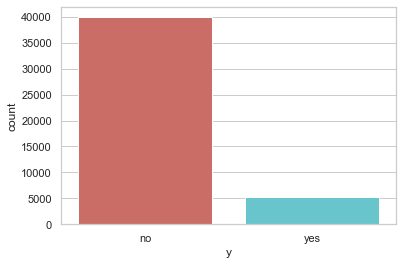

In [22]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()

In [28]:
count_no_sub = len(data[data['y']=='no'])
count_sub = len(data[data['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


#### Initial observations from above visualizations

###### the ratio of no-subscription to subscription instances is 88:11,no of customers subscribed to not subscribe are highly imbalanced

###### The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
###### The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
###### campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [75]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [78]:
# droping maritial status as it is not contributing for predicting the outcome
data_new = data.drop('marital',axis=1)

In [79]:
data_new.head(1)

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [207]:
### Create dummy variables
import pandas as pd
data1=pd.get_dummies(data_new)

In [208]:
# As we know if y value is 1 it is yes and if it is 0 it is no we dont need another column for predicting
# For default customers subscription is not offered
data1=data1.drop('y_no',axis=1)
data1=data1.drop('default_yes',axis=1)

In [210]:
# Dividing the data into input and output variables
x = data1.iloc[:,:46]
y=data1.iloc[:,47]

In [211]:
x.head(1)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [212]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Anusha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [213]:
#predict for x dataset
y_pred=classifier.predict(x)
y_pred_prob=classifier.predict_proba(x)
y_pred_prob

array([[0.9603909 , 0.0396091 ],
       [0.97422741, 0.02577259],
       [0.97488937, 0.02511063],
       ...,
       [0.42706992, 0.57293008],
       [0.91695166, 0.08304834],
       [0.84081063, 0.15918937]])

In [214]:
y_pred_df=pd.DataFrame({'actual':y,'predicted':y_pred,'prob[0]':y_pred_prob[:,0],'prob[1]':y_pred_prob[:,1]})
y_pred_df

,actual,predicted,prob[0],prob[1]
0,0,0,0.960391,0.039609
1,0,0,0.974227,0.025773
2,0,0,0.974889,0.025111
3,0,0,0.978074,0.021926
4,0,0,0.857484,0.142516
...,...,...,...,...
45206,1,1,0.394014,0.605986
45207,1,0,0.826813,0.173187
45208,1,1,0.427070,0.572930
45209,0,0,0.916952,0.083048


In [215]:
## calculating the model accuracy
pd.crosstab(y_pred_df.actual,y_pred_df.predicted)

predicted,0,1
actual,,
0,39148,774
1,4179,1110


In [216]:
## confusion matrix  for calculating model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_pred_df.actual,y_pred_df.predicted)
accuracy=accuracy_score(y_pred_df.actual,y_pred_df.predicted)
print(cm,accuracy)

[[39148   774]
 [ 4179  1110]] 0.890447015106943


In [217]:
# prop of majority class
max(data.y.value_counts())/len(data.y)

0.8830151954170445

In [218]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred_df.actual,y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.62     45211
weighted avg       0.87      0.89      0.87     45211



In [219]:
# Roc Curve- truepositive rate vs false positive rate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])

Text(0, 0.5, 'True Positive Rate')

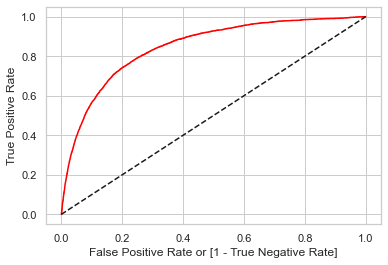

In [220]:
auc=roc_auc_score(y,y_pred)

import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(fpr,tpr,color='red',label='logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [223]:
## Goodness of the model
## accuracy should be greater than the proportion of majority class


In [222]:
# testing the model with cross validation data
# split the data into train and test
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data1,test_size=0.3)

In [95]:
train_data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes
2817,35,51,14,824,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36144,35,240,11,161,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
35697,46,716,8,557,1,172,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
30597,56,1554,6,15,6,190,27,1,0,0,...,0,0,0,0,0,0,1,0,0,0
11444,48,343,19,136,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,36,63,2,56,8,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
17350,50,546,28,82,6,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34185,29,1854,4,390,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
23244,43,46,27,63,8,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [225]:
test_data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes
14674,57,1103,15,98,4,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11826,60,196,20,583,3,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
25599,42,-430,19,298,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
27119,40,72,21,849,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
5151,33,1499,21,144,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30177,48,558,5,708,8,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6049,33,-271,26,118,2,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
22897,54,1331,25,240,9,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16147,54,-369,22,246,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [226]:
# Dividing the data into input and output variables
x = train_data.iloc[:,:46]
y=train_data.iloc[:,47]

In [227]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Anusha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [228]:
#predict for x dataset
y_pred=classifier.predict(x)
y_pred_prob=classifier.predict_proba(x)
y_pred_prob

array([[0.94052092, 0.05947908],
       [0.97335782, 0.02664218],
       [0.8909449 , 0.1090551 ],
       ...,
       [0.96473539, 0.03526461],
       [0.96568785, 0.03431215],
       [0.72132392, 0.27867608]])

In [229]:
y_pred_df_train=pd.DataFrame({'actual':y,'predicted':y_pred,'prob[0]':y_pred_prob[:,0],'prob[1]':y_pred_prob[:,1]})
y_pred_df_train

,actual,predicted,prob[0],prob[1]
36403,0,0,0.940521,0.059479
21843,0,0,0.973358,0.026642
22276,0,0,0.890945,0.109055
37405,0,0,0.899567,0.100433
14216,0,1,0.479108,0.520892
...,...,...,...,...
40427,0,0,0.623323,0.376677
27654,0,0,0.996790,0.003210
7106,0,0,0.964735,0.035265
27449,0,0,0.965688,0.034312


In [230]:
## confusion matrix  for calculating model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_pred_df_train.actual,y_pred_df_train.predicted)
accuracy_train=accuracy_score(y_pred_df_train.actual,y_pred_df_train.predicted)
print(cm,accuracy_train)

[[27391   565]
 [ 2903   788]] 0.8904161531898758


In [231]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred_df_train.actual,y_pred_df_train.predicted))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27956
           1       0.58      0.21      0.31      3691

    accuracy                           0.89     31647
   macro avg       0.74      0.60      0.63     31647
weighted avg       0.87      0.89      0.87     31647



In [232]:
# Dividing the test data into input and output variables
x = test_data.iloc[:,:46]
y=test_data.iloc[:,47]

In [233]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Anusha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [234]:
#predict for x dataset
y_pred=classifier.predict(x)
y_pred_prob=classifier.predict_proba(x)
y_pred_prob

array([[0.99195639, 0.00804361],
       [0.91114435, 0.08885565],
       [0.95256196, 0.04743804],
       ...,
       [0.99115782, 0.00884218],
       [0.96007462, 0.03992538],
       [0.80945649, 0.19054351]])

In [235]:
y_pred_df_test=pd.DataFrame({'actual':y,'predicted':y_pred,'prob[0]':y_pred_prob[:,0],'prob[1]':y_pred_prob[:,1]})
y_pred_df_test

,actual,predicted,prob[0],prob[1]
14674,0,0,0.991956,0.008044
11826,0,0,0.911144,0.088856
25599,0,0,0.952562,0.047438
27119,1,0,0.550698,0.449302
5151,0,0,0.981352,0.018648
...,...,...,...,...
30177,0,0,0.974931,0.025069
6049,0,0,0.989456,0.010544
22897,0,0,0.991158,0.008842
16147,0,0,0.960075,0.039925


In [236]:
## confusion matrix  for calculating model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_pred_df_test.actual,y_pred_df_test.predicted)
accuracy_test=accuracy_score(y_pred_df_test.actual,y_pred_df_test.predicted)
print(cm,accuracy_test)

[[11729   237]
 [ 1230   368]] 0.8918460631082277


In [237]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred_df_test.actual,y_pred_df_test.predicted))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.61      0.23      0.33      1598

    accuracy                           0.89     13564
   macro avg       0.76      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



#### From above accuracies and other parameters for cross validation data we can comclude it is performing well